<a href="https://colab.research.google.com/github/soniaronner/ML-final-project/blob/main/Final_customer_churn_group2_masternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#why: to be able to work with the respective functions and models included in the libraries

In [ ]:
#what: import dataset
data=pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')
#why: in order to do predictive statistical analysis with the data and fit a model to predict customer churn for our telecom company

# **Step 1: Data exploration**

In [ ]:
#explore the data and leave original input untouched
data1=pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [ ]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#different types of features, object=string, integers, floats
data1.info()
#Totalcharges is categorized as object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#missing values?
data1.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#missing values in Totalcharges 
#clean data - see Step 2: Data preparation
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors='coerce')
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#dataset contains 7043 observations and 21 columns
data1.shape

(7043, 21)

In [ ]:
#numerical variables 
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#unique values of the data - divide into categories for exploration
for i in data1.columns:
    print(i)
    print (data1[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
#plot the data
#visualize dependent variable - churn rate
import plotly.express as px
import plotly.graph_objects as go

Labels=data1["Churn"].value_counts().keys()
Values=data1["Churn"].value_counts()

plot_data1= [go.Pie(labels=Labels,values=Values,
                   marker =dict(colors=['Blue', 'Pink'],line = dict(color="White")),rotation=90)]

fig=go.Figure(data=plot_data1)
fig.show()

In [ ]:
#preliminary encoding for visualizing
churn_numeric = {'Yes':1, 'No':0} 
data1.Churn.replace(churn_numeric, inplace=True) #replace yes with 1 and no with 0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

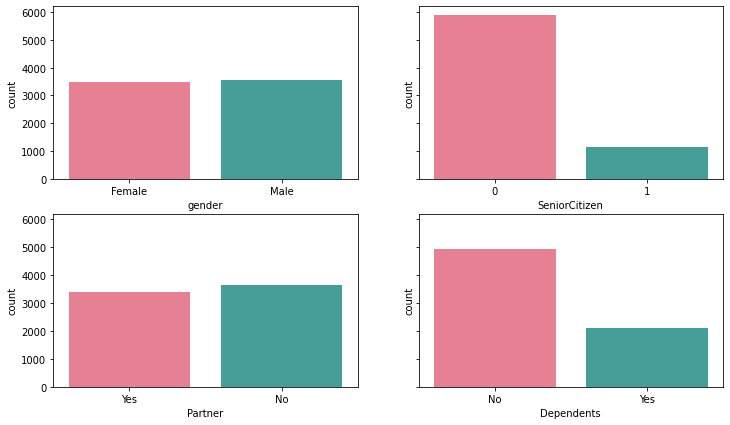

In [ ]:
#analyze customer churn for each variable
#countplots for displaying customer charactristics
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=data1, ax=axes[0,0], palette="husl")
sns.countplot("SeniorCitizen", data=data1, ax=axes[0,1], palette="husl")
sns.countplot("Partner", data=data1, ax=axes[1,0], palette="husl")
sns.countplot("Dependents", data=data1, ax=axes[1,1], palette="husl")

In [ ]:
data1[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [ ]:
data1[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [ ]:
data1[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [ ]:
data1[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [ ]:
#countplots for displaying after-sales services variables

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

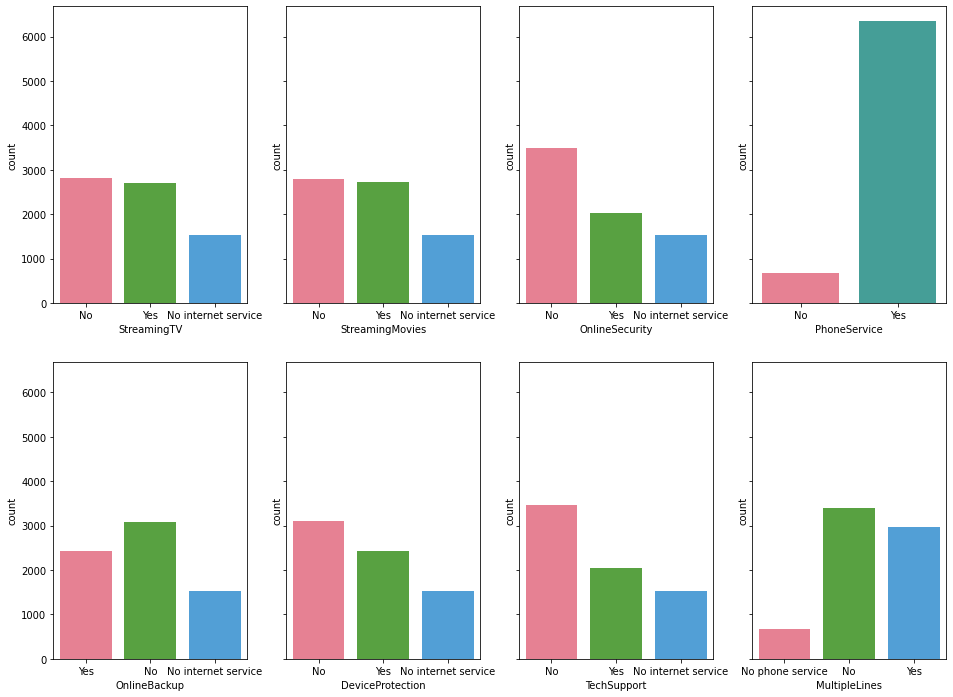

In [ ]:
#analyze customer churn for each variable
#countplots for displaying after-sales services variables
fig, axes = plt.subplots(2, 4, figsize=(16, 12), sharey=True)
sns.countplot("StreamingTV", data=data1, ax=axes[0,0], palette="husl")
sns.countplot("StreamingMovies", data=data1, ax=axes[0,1], palette="husl")
sns.countplot("OnlineSecurity", data=data1, ax=axes[0,2], palette="husl")
sns.countplot("OnlineBackup", data=data1, ax=axes[1,0], palette="husl")
sns.countplot("DeviceProtection", data=data1, ax=axes[1,1], palette="husl")
sns.countplot("TechSupport", data=data1, ax=axes[1,2], palette="husl")
sns.countplot("PhoneService", data=data1, ax=axes[0,3], palette="husl")
sns.countplot("MultipleLines", data=data1, ax=axes[1,3], palette="husl")

In [ ]:
data1[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [ ]:
data1[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [ ]:
data1[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [ ]:
data1[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [ ]:
data1[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [ ]:
data1[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [ ]:
data1[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [ ]:
data1[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



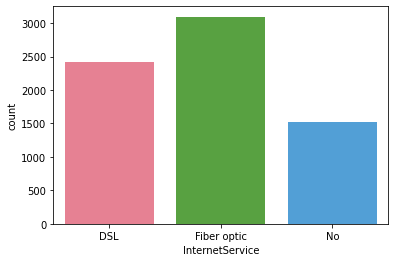

In [ ]:
sns.countplot("InternetService", data=data1, palette="husl")

In [ ]:
data1[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [ ]:
#why do most customers churn when using fiber optic?
#cheapest or most expensive option? -> compare to monthly charges

In [ ]:
data1[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()
#most expensive internetservice option

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [ ]:
data1[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



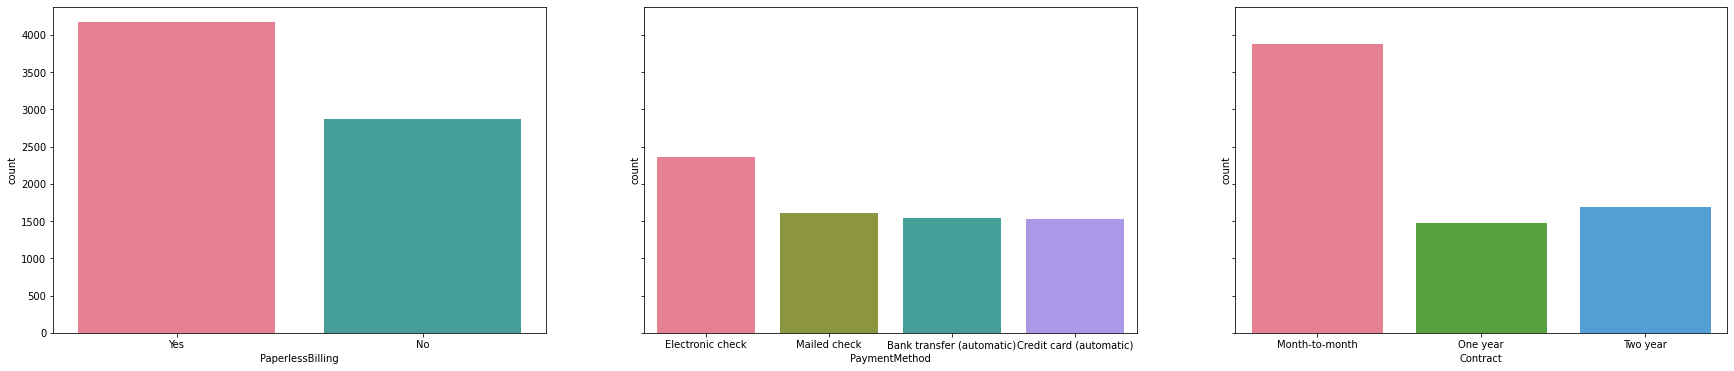

In [ ]:
## exploring customer account information
#countplots for displaying 
fig, axes = plt.subplots(1,3, figsize=(30, 6), sharey=True)
sns.countplot("PaperlessBilling", data=data1, ax=axes[0], palette="husl")
sns.countplot("PaymentMethod", data=data1, ax=axes[1], palette="husl")
sns.countplot("Contract", data=data1, ax=axes[2], palette="husl")

In [ ]:
data1[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [ ]:
data1[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [ ]:
data1[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


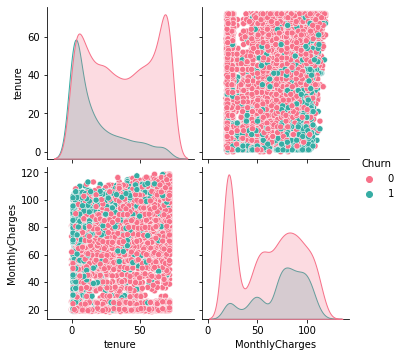

In [ ]:
#first tenure, monthly chargs (total charges is just the product)


 # pairplot plots pairwise relationships in the data
sns.pairplot(data1[['Churn', 'tenure', 'MonthlyCharges']], hue="Churn", palette="husl")

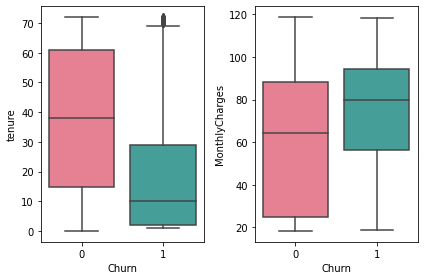

In [ ]:
#finding out after which time customers churn on average and what the amount of monthly charges is
# this helps organize our plots and keep them in the same figure
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x='Churn', y='tenure', data=data1, ax=axs[0], palette="husl")
sns.boxplot(x='Churn', y='MonthlyCharges', data=data1, ax=axs[1], palette="husl")

# this prevents plots from overlapping
plt.tight_layout()

In [ ]:
#correlation coefficients just displays numerical variables - see step 2 for encoded features
data1.corr(method='pearson').style.format('{:.2f}').background_gradient()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.00,0.02,0.22,0.10,0.15
tenure,0.02,1.00,0.25,0.83,-0.35
MonthlyCharges,0.22,0.25,1.00,0.65,0.19
TotalCharges,0.10,0.83,0.65,1.00,-0.20
Churn,0.15,-0.35,0.19,-0.20,1.00


# **Step 2: Data preparation**

In [ ]:
#show data for preliminary revision
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#different types of features, object=string, integers, floats
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Encoding:** Display categorical values by numerical values to perform all kinds of models, since we are going to train a model like logistic regression, which doesn't support categorical input

In [ ]:
#encode categorical data - turn strings into integer or float
#replace yes with 1 and no with 0
churn_numeric = {'Yes':1, 'No':0} 
data.replace(churn_numeric, inplace=True) 

In [ ]:
#drop customer id - not relevant 
data.drop('customerID', axis='columns', inplace=True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
#encode gender seperately - string is "Male" or "Female"
data['gender'].replace({'Male':0,'Female':1},inplace=True)

In [ ]:
#replace string "No internet service" with "No" 
Column = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Column:
  data[i] = data[i].replace({'No internet service':'No'})

In [ ]:
#replace string "No phone service" with "No"
Column = ['MultipleLines']
for i in Column:
  data[i] = data[i].replace({'No phone service':'No'})

In [ ]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
#now we can encode "No"
#the chosen features are now divided into different binary options
Col = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Col:
  data[i].replace({'No':0,'Yes':1},inplace=True)

In [ ]:
#split the below mentioned columns in binary form 
data=pd.get_dummies(data=data,columns=['InternetService','Contract','PaymentMethod'])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#total charges object?
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
#dropping missing values in TotalCharges
#cleaning data in TotalCharges with empty string
data=data[data.TotalCharges!=' ']

In [ ]:
#observations are reduced from 7043 to 7032 (dropped 11 due to missing values in TotalCharges)
data.shape

(7032, 27)

In [ ]:
# Scaling the below mentioned columns
Columns_Scale=['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()

data[Columns_Scale] = scaler.fit_transform(data[Columns_Scale])

In [ ]:
#prepared data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [ ]:
#compute correlation matrix with encoded variables
#27 variables included now
data.corr(method='pearson').style.format('{:.2f}').background_gradient()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.00,0.00,0.00,-0.01,-0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.01,-0.00,-0.01,0.01,0.00,-0.01,0.00,0.02,-0.00,-0.00,-0.01
SeniorCitizen,0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.04,0.07,0.06,-0.06,0.11,0.12,0.16,0.22,0.10,0.15,-0.18,-0.11,0.25,0.14,-0.05,-0.12,-0.02,-0.02,0.17,-0.15
Partner,0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,-0.15,-0.00,-0.00,0.00,-0.28,0.08,0.25,0.11,0.08,-0.08,-0.10
Dependents,-0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.08,0.02,0.01,0.06,-0.02,-0.04,-0.11,-0.11,0.06,-0.16,0.14,0.05,-0.16,-0.23,0.07,0.20,0.05,0.06,-0.15,0.06
tenure,-0.01,0.02,0.38,0.16,1.00,0.01,0.33,0.33,0.36,0.36,0.33,0.28,0.29,0.00,0.25,0.83,-0.35,-0.04,0.01,0.02,-0.65,0.20,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.09,-0.05,-0.07,-0.10,-0.02,-0.03,0.02,0.25,0.11,0.01,0.17,-0.45,0.29,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00
MultipleLines,0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.20,0.20,0.10,0.26,0.26,0.16,0.49,0.47,0.04,-0.21,-0.20,0.37,-0.09,-0.00,0.11,0.08,0.06,0.08,-0.23
OnlineSecurity,0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,1.00,0.28,0.27,0.35,0.18,0.19,-0.00,0.30,0.41,-0.17,-0.33,0.32,-0.03,-0.25,0.10,0.19,0.09,0.12,-0.11,-0.08
OnlineBackup,0.01,0.07,0.14,0.02,0.36,-0.05,0.20,0.28,1.00,0.30,0.29,0.28,0.27,0.13,0.44,0.51,-0.08,-0.38,0.16,0.17,-0.16,0.08,0.11,0.09,0.09,-0.00,-0.17
DeviceProtection,0.00,0.06,0.15,0.01,0.36,-0.07,0.20,0.27,0.30,1.00,0.33,0.39,0.40,0.10,0.48,0.52,-0.07,-0.38,0.15,0.18,-0.23,0.10,0.17,0.08,0.11,-0.00,-0.19


In [ ]:
#split the data in training and test set

y = data['Churn'].values

data.drop('Churn', axis=1, inplace=True)

x = data.values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


##now we can use the dataset for different kinds of models



# **Step 3: Modeling & Model evaluation**

Step 3.1.: Model short listing and preliminary Model selection

In [ ]:
#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from matplotlib import pyplot

### **MODEL 1: KNN**

In [ ]:
#define model
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#identify optimal parameters 

param_grid = {'n_neighbors' : [3,5,12,20,30]}

grid_search_cv = GridSearchCV(KNeighborsClassifier(), 
                              param_grid, 
                              cv=10, 
                              return_train_score=True, n_jobs=3)

grid_search_cv.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid={'n_neighbors': [3, 5, 12, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
#print best parameter combination identified

print('best_score', grid_search_cv.best_score_)
print('best_params', grid_search_cv.best_params_)

best_score 0.7871140728048622
best_params {'n_neighbors': 30}


In [ ]:
#adapt model using best parameters and fit model

model_according_to_cv_for_final_evaluation = grid_search_cv.best_estimator_
model_according_to_cv_for_final_evaluation

model_according_to_cv_for_final_evaluation.fit(x_train, y_train) #fit the model on train set and evaluate

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
#create predictions for training and test set

y_train_pred = model_according_to_cv_for_final_evaluation.predict(x_train)
y_test_pred = model_according_to_cv_for_final_evaluation.predict(x_test)

In [ ]:
#Evaluate KNN, version 1

acc = accuracy_score(y_test, y_test_pred ) #subset accuracy, set of lables predicted for sample must match corresponding set of lables in y_true
prec = precision_score(y_test, y_test_pred ) #ability not to label a positive sample that is negative 
rec = recall_score(y_test, y_test_pred ) #ability of the classifier to find all positive samples
f1 = f1_score(y_test, y_test_pred ) #balanced F-Scroe -> weighted average of the precision and recall
fbeta = fbeta_score(y_test, y_test_pred, beta=2.0) #weighted harmonic mean of precision and recall

results = pd.DataFrame([['KNeighborsClassifier', 
acc, prec, rec, f1, fbeta]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  KNeighborsClassifier  0.777541   0.582043  0.513661  0.545718  0.526021


In [ ]:
#Evaluate KNN (same and better as before), version 2

print('Performance on training set:')
print(classification_report(y_train, y_train_pred))
print('---')
print('Performance on test set:')
print(classification_report(y_test, y_test_pred))

Performance on training set:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4122
           1       0.65      0.56      0.60      1503

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1041
           1       0.58      0.51      0.55       366

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
#compute confusion matrix and print confusion matrix

print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test, y_test_pred))

Performance on training set summarized as confusion matrix:
[[3663  459]
 [ 662  841]]
---
Performance on test set summarized as confusion matrix:
[[906 135]
 [178 188]]


Text(0.5, 1.0, 'Confusion Matrix KNN')

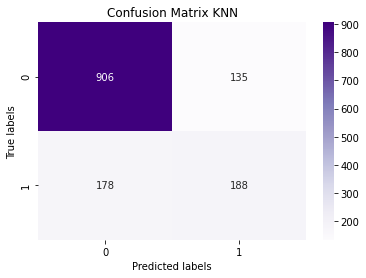

In [ ]:
#plot confusion matrix for test set 

ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix KNN')

## **MODEL 2: DECISION TREE CLASSIFIER**

In [ ]:
#define model

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#identify optimal parameters 

param_grid = {'max_depth': [10, 7, 5, 3, 2, 1], 
              'min_samples_split': [2, 5, 10, 15, 20]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), 
                              param_grid, 
                              cv=10, 
                              return_train_score=True, n_jobs=3)

grid_search_cv.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'max_depth': [10, 7, 5, 3, 2, 1],
                     

In [ ]:
#print best parameter combination identified

print('best_score', grid_search_cv.best_score_)
print('best_params', grid_search_cv.best_params_)

best_score 0.7928049835122204
best_params {'max_depth': 7, 'min_samples_split': 10}


In [ ]:
#adapt model using best parameters and fit model

model_according_to_cv_for_final_evaluation = grid_search_cv.best_estimator_
model_according_to_cv_for_final_evaluation

model_according_to_cv_for_final_evaluation.fit(x_train, y_train) #fit the model on train set and evaluate on test set 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predictiosn for training and test set
y_train_pred = model_according_to_cv_for_final_evaluation.predict(x_train)
y_test_pred = model_according_to_cv_for_final_evaluation.predict(x_test)

In [ ]:
#Evaluate Decision Tree Classifier, version 1

acc = accuracy_score(y_test, y_test_pred )
prec = precision_score(y_test, y_test_pred )
rec = recall_score(y_test, y_test_pred )
f1 = f1_score(y_test, y_test_pred )
fbeta = fbeta_score(y_test, y_test_pred, beta=2.0)

results = pd.DataFrame([['DecisionTreeClassifier', 
acc, prec, rec, f1, fbeta]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  DecisionTreeClassifier  0.790334   0.617162  0.510929  0.559043  0.529145


In [ ]:
#evaluate decision tree classifier, version 2

print('Performance on training set:')
print(classification_report(y_train, y_train_pred))
print('---')
print('Performance on test set:')
print(classification_report(y_test, y_test_pred))

Performance on training set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4122
           1       0.70      0.56      0.62      1503

    accuracy                           0.82      5625
   macro avg       0.77      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.51      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#compute confusion matrix and print confusion matrix

print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test, y_test_pred))

Performance on training set summarized as confusion matrix:
[[3752  370]
 [ 654  849]]
---
Performance on test set summarized as confusion matrix:
[[925 116]
 [179 187]]


Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

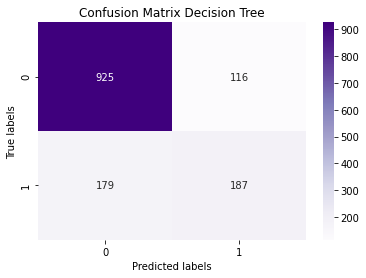

In [ ]:
#plot confusion matrix for test set

ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Decision Tree')

### **MODEL 3: RANDOM FOREST CLASSIFIER**

In [ ]:
#define model

classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Note: Fix below (min_samples_split)

In [ ]:
#identify optimal parameters 

param_grid = {'max_depth': [20, 10, 7, 5, 3, 2, 1], 'min_samples_leaf': [2, 5, 10, 15, 20]}
grid_search_cv = GridSearchCV(RandomForestClassifier(), 
                              param_grid, 
                              cv=10, 
                              return_train_score=True, n_jobs=3)

grid_search_cv.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#print best parameter combination identified

print('best_score', grid_search_cv.best_score_)
print('best_params', grid_search_cv.best_params_)

best_score 0.8044630156472262
best_params {'max_depth': 10, 'min_samples_leaf': 5}


In [ ]:
#adapt model using best parameters and fit model

model_according_to_cv_for_final_evaluation = grid_search_cv.best_estimator_
model_according_to_cv_for_final_evaluation

model_according_to_cv_for_final_evaluation.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#identify feature importance, trial 1
importance = model_according_to_cv_for_final_evaluation.feature_importances_
print(importance)

[0.01239576 0.0119884  0.01135511 0.00932784 0.1791241  0.00722052
 0.0131646  0.01924446 0.01117533 0.00798962 0.02036241 0.0136963
 0.01349483 0.02571171 0.11160411 0.14924792 0.02964143 0.01745206
 0.08486108 0.1227642  0.01680397 0.0445631  0.00706269 0.00616906
 0.0450901  0.00848929]


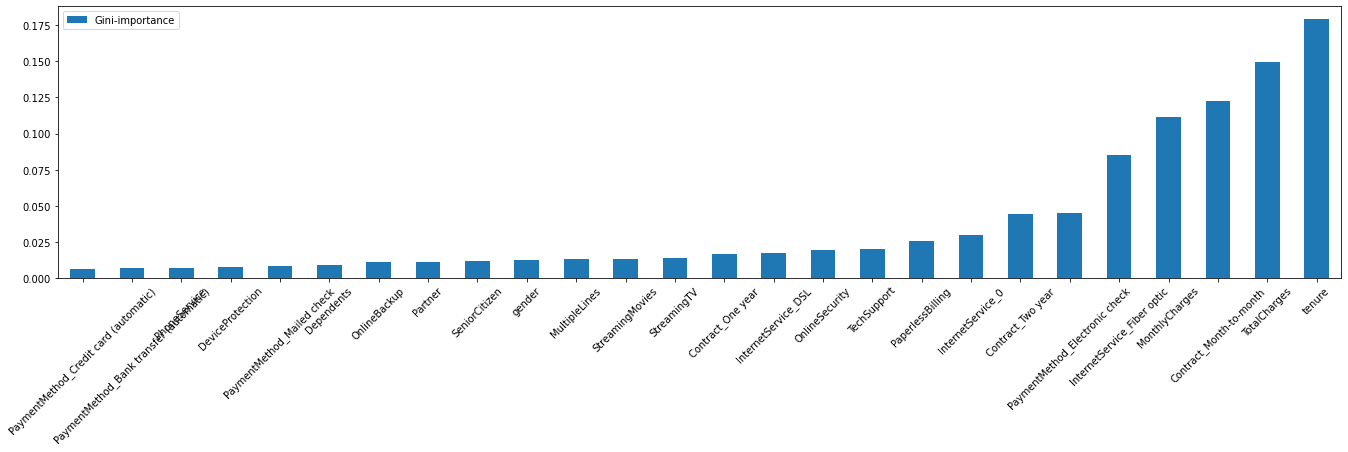

In [ ]:
#identify feature importance, trial 2
import pandas as pd
%matplotlib inline

feats = {}
for feature, importance in zip(data.columns, model_according_to_cv_for_final_evaluation.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(23, 5), sharey=True)


Fix Axis!

Feature: 0, Score 0.01240
Feature: 1, Score 0.01199
Feature: 2, Score 0.01136
Feature: 3, Score 0.00933
Feature: 4, Score 0.17912
Feature: 5, Score 0.00722
Feature: 6, Score 0.01316
Feature: 7, Score 0.01924
Feature: 8, Score 0.01118
Feature: 9, Score 0.00799
Feature: 10, Score 0.02036
Feature: 11, Score 0.01370
Feature: 12, Score 0.01349
Feature: 13, Score 0.02571
Feature: 14, Score 0.11160
Feature: 15, Score 0.14925
Feature: 16, Score 0.02964
Feature: 17, Score 0.01745
Feature: 18, Score 0.08486
Feature: 19, Score 0.12276
Feature: 20, Score 0.01680
Feature: 21, Score 0.04456
Feature: 22, Score 0.00706
Feature: 23, Score 0.00617
Feature: 24, Score 0.04509
Feature: 25, Score 0.00849


<function matplotlib.pyplot.show>

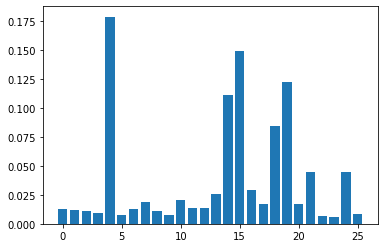

In [ ]:
#feature importance trial 3
importance = model_according_to_cv_for_final_evaluation.feature_importances_
#summarize feature importance
for i,v in enumerate(importance): print('Feature: %0d, Score %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show




Features reihen? 

In [ ]:
#predictions for training and test set
y_train_pred = model_according_to_cv_for_final_evaluation.predict(x_train)
y_test_pred = model_according_to_cv_for_final_evaluation.predict(x_test)

In [ ]:
#Evaluate Random Forest, version 1

accuracy = accuracy_score(y_test, y_test_pred )  
#set of labels predicted for sample must match corresponding set of labels in y_true
precision = precision_score(y_test, y_test_pred )  
#ability not to label a positive sample that is negative 
recall = recall_score(y_test, y_test_pred ) 
#ability of the classifier to find all positive samples
f1 = f1_score(y_test, y_test_pred )
fbeta = fbeta_score(y_test, y_test_pred, beta=2.0)


results = pd.DataFrame([['DecisionTreeClassifier', 
acc, prec, rec, f1, fbeta]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Accuracy", "Precision", 
"Recall"], ascending = False)
print (results)

                    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  DecisionTreeClassifier  0.790334   0.617162  0.510929  0.561728  0.521191


In [ ]:
#evaluate random forest, version 2
print('Performance on training set:')
print(classification_report(y_train, y_train_pred))
print('---')
print('Performance on test set:')
print(classification_report(y_test, y_test_pred))

Performance on training set:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4122
           1       0.77      0.60      0.67      1503

    accuracy                           0.84      5625
   macro avg       0.82      0.77      0.79      5625
weighted avg       0.84      0.84      0.84      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.50      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
#compute and show confusion matrix of training and test set
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test, y_test_pred))

Performance on training set summarized as confusion matrix:
[[3856  266]
 [ 607  896]]
---
Performance on test set summarized as confusion matrix:
[[941 100]
 [184 182]]


Text(0.5, 1.0, 'Confusion Matrix Random Forest')

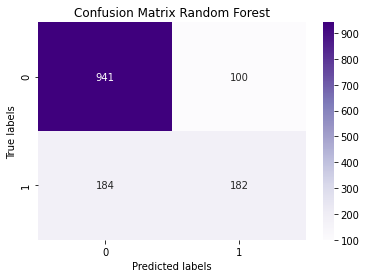

In [ ]:
#plot confusion matrix for test set

ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Random Forest')

### **MODEL 4: LOGISTIC REGRESSION**

In [ ]:
#define model with identified optimal parameters

classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#fit and predict model

classifier.fit(x_train, y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

In [ ]:
#Evaluate Logistic Regression, version 1

acc = accuracy_score(y_test, y_test_pred )
prec = precision_score(y_test, y_test_pred )
rec = recall_score(y_test, y_test_pred )
f1 = f1_score(y_test, y_test_pred )
fbeta = fbeta_score(y_test, y_test_pred, beta=2.0)

results = pd.DataFrame([['LogisticRegression', 
acc, prec, rec, f1, fbeta]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  LogisticRegression  0.798152   0.632258  0.535519  0.579882  0.552424


In [ ]:
#evaluate logistic regression, version 2

print('Performance on training set:')
print(classification_report(y_train, y_train_pred))
print('---')
print('Performance on test set:')
print(classification_report(y_test, y_test_pred))

Performance on training set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4122
           1       0.66      0.56      0.61      1503

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test, y_test_pred))

Performance on training set summarized as confusion matrix:
[[3696  426]
 [ 664  839]]
---
Performance on test set summarized as confusion matrix:
[[927 114]
 [170 196]]


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

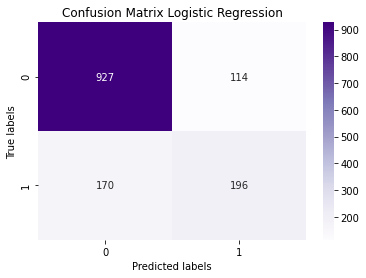

In [ ]:
#Confusion Matrix Logistic Regression

ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Logistic Regression')

In [ ]:
# Analyzing Coefficients of logit

feature_importances = pd.concat([
pd.DataFrame(data.
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)

feature_importances = feature_importances.dropna() #dropping NaN variables



feature_importances.sort_values("coef", ascending = False)

,features,coef
15,TotalCharges,1.187049
18,InternetService_Fiber optic,0.814299
19,Contract_Month-to-month,0.699723
12,StreamingMovies,0.309784
13,PaperlessBilling,0.302467
11,StreamingTV,0.273165
6,MultipleLines,0.272147
24,PaymentMethod_Electronic check,0.264097
1,SeniorCitizen,0.231284
20,Contract_One year,0.031530


--> Probability that a customer churns? Per observation!

# ***Add-on: Upsampling**
Since we are handling an imbalanced dataset, it would be of interest to see if the correlation matrices and accuracy scores increase after upsampling.

In [ ]:
# inbalanced data - sampling
from imblearn.over_sampling import SMOTE

In [ ]:
# therefore we introduce SMOTE upsampling and perform our two best scoring models with the sample (RF & LR)
sm = SMOTE(random_state=1, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
#a new train-test split is performed on basis of the sampling data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=1)

In [ ]:
#by visualizing the data we can see that now the churning and non-churning customers are equally distributed
Labels= data1['Churn'].value_counts().keys()
Values=pd.value_counts(y_train_res)/len(y_train_res)

plot_data= [go.Pie(labels=Labels,values=Values,
                   marker =dict(colors=['Blue', 'Pink'],line = dict(color="White")),rotation=180)]

fig=go.Figure(data=plot_data)
fig.show()

In [ ]:
#the number of observations increases
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", X_train_res.shape)

Original x train shape,  (5625, 26)
Resample x train shape,  (8244, 26)


**Add-on Model1**: RandomForest




In [ ]:
#RandomForest
param_grid = {'max_depth': [20, 10, 7, 5, 3, 2, 1], 'min_samples_leaf': [2, 5, 10, 15, 20]}
grid_search_cv = GridSearchCV(RandomForestClassifier(), 
                              param_grid, 
                              cv=10, 
                              return_train_score=True, n_jobs=3)

grid_search_cv.fit(X_train_2, y_train_2)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#print best parameter combination identified

print('best_score', grid_search_cv.best_score_)
print('best_params', grid_search_cv.best_params_)

best_score 0.8424541316043592
best_params {'max_depth': 20, 'min_samples_leaf': 2}


In [ ]:
#adapt model using best parameters and fit model

model_according_to_cv_for_final_evaluation = grid_search_cv.best_estimator_
model_according_to_cv_for_final_evaluation

model_according_to_cv_for_final_evaluation.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred2 = model_according_to_cv_for_final_evaluation.predict(X_train_2)
y_test_pred2 = model_according_to_cv_for_final_evaluation.predict(X_test_2)

In [ ]:
#evaluate random forest, version 2
print('Performance on training set:')
print(classification_report(y_train_2, y_train_pred2))
print('---')
print('Performance on test set:')
print(classification_report(y_test_2, y_test_pred2))

Performance on training set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3299
           1       0.95      0.97      0.96      3296

    accuracy                           0.96      6595
   macro avg       0.96      0.96      0.96      6595
weighted avg       0.96      0.96      0.96      6595

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       823
           1       0.83      0.84      0.83       826

    accuracy                           0.83      1649
   macro avg       0.83      0.83      0.83      1649
weighted avg       0.83      0.83      0.83      1649



In [ ]:
#compute and show confusion matrix of training and test set
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train_2, y_train_pred2))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test_2, y_test_pred2))

Performance on training set summarized as confusion matrix:
[[3113  186]
 [  89 3207]]
---
Performance on test set summarized as confusion matrix:
[[678 145]
 [136 690]]


Text(0.5, 1.0, 'Confusion Matrix Random Forest')

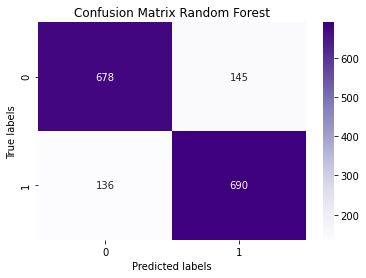

In [ ]:
#plot confusion matrix for test set

ax= plt.subplot()
cm = confusion_matrix(y_test_2, y_test_pred2)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Random Forest')

**Add-on Model2**: LogisticRegression

In [ ]:
#define model
classifier=LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#fit model
classifier.fit(X_train_2, y_train_2)
y_train_pred = classifier.predict(X_train_2)
y_test_pred = classifier.predict(X_test_2)

In [ ]:
print('Performance on training set:')
print(classification_report(y_train_2, y_train_pred))
print('---')
print('Performance on test set:')
print(classification_report(y_test_2, y_test_pred))

Performance on training set:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3299
           1       0.76      0.81      0.78      3296

    accuracy                           0.78      6595
   macro avg       0.78      0.78      0.78      6595
weighted avg       0.78      0.78      0.78      6595

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       823
           1       0.75      0.79      0.77       826

    accuracy                           0.76      1649
   macro avg       0.76      0.76      0.76      1649
weighted avg       0.76      0.76      0.76      1649



In [ ]:
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train_2, y_train_pred))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test_2, y_test_pred))

Performance on training set summarized as confusion matrix:
[[2436  863]
 [ 617 2679]]
---
Performance on test set summarized as confusion matrix:
[[605 218]
 [172 654]]


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

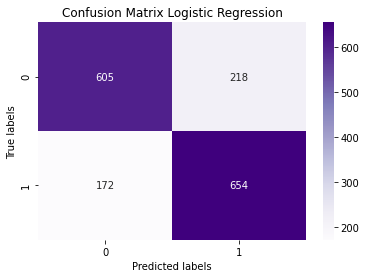

In [ ]:
#Confusion Matrix Logistic Regression

ax= plt.subplot()
cm = confusion_matrix(y_test_2, y_test_pred)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Logistic Regression')

# ***Add-on2: stratified sample*** 




**Add-on Model1**: RandomForest

In [ ]:
 # Stratified sampling
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y) 
print(X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape) 

(5625, 26) (1407, 26) (5625,) (1407,)


In [ ]:
#RandomForest
param_grid = {'max_depth': [20, 10, 7, 5, 3, 2, 1], 'min_samples_leaf': [2, 5, 10, 15, 20]}
grid_search_cv = GridSearchCV(RandomForestClassifier(), 
                              param_grid, 
                              cv=10, 
                              return_train_score=True, n_jobs=3)

grid_search_cv.fit(X_train_3, y_train_3)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#print best parameter combination identified

print('best_score', grid_search_cv.best_score_)
print('best_params', grid_search_cv.best_params_)

best_score 0.8039047932087255
best_params {'max_depth': 10, 'min_samples_leaf': 20}


In [ ]:
#adapt model using best parameters and fit model

model_according_to_cv_for_final_evaluation = grid_search_cv.best_estimator_
model_according_to_cv_for_final_evaluation

model_according_to_cv_for_final_evaluation.fit(X_train_3, y_train_3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred3 = model_according_to_cv_for_final_evaluation.predict(X_train_3)
y_test_pred3 = model_according_to_cv_for_final_evaluation.predict(X_test_3)

In [ ]:
#evaluate random forest, version 2
print('Performance on training set:')
print(classification_report(y_train_3, y_train_pred3))
print('---')
print('Performance on test set:')
print(classification_report(y_test_3, y_test_pred3))

Performance on training set:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4130
           1       0.70      0.55      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.73      0.75      5625
weighted avg       0.81      0.82      0.81      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
#compute and show confusion matrix of training and test set
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train_3, y_train_pred3))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test_3, y_test_pred3))

Performance on training set summarized as confusion matrix:
[[3785  345]
 [ 674  821]]
---
Performance on test set summarized as confusion matrix:
[[937  96]
 [188 186]]


Text(0.5, 1.0, 'Confusion Matrix Random Forest')

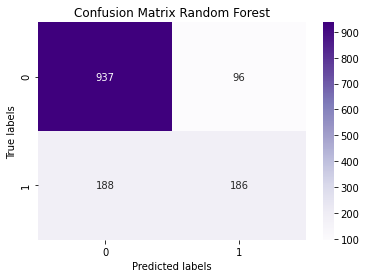

In [ ]:
#plot confusion matrix for test set

ax= plt.subplot()
cm = confusion_matrix(y_test_3, y_test_pred3)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Random Forest')

**Add-on Model2**: LogisticRegression

In [ ]:
#define model
classifier=LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#fit model
classifier.fit(X_train_3, y_train_3)
y_train_pred4 = classifier.predict(X_train_3)
y_test_pred4 = classifier.predict(X_test_3)

In [ ]:
print('Performance on training set:')
print(classification_report(y_train_3, y_train_pred4))
print('---')
print('Performance on test set:')
print(classification_report(y_test_3, y_test_pred4))

Performance on training set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625

---
Performance on test set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
print('Performance on training set summarized as confusion matrix:')
print(confusion_matrix(y_train_3, y_train_pred4))
print('---')
print('Performance on test set summarized as confusion matrix:')
print(confusion_matrix(y_test_3, y_test_pred4))

Performance on training set summarized as confusion matrix:
[[3706  424]
 [ 680  815]]
---
Performance on test set summarized as confusion matrix:
[[937  96]
 [169 205]]


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

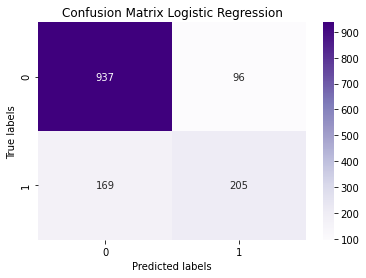

In [ ]:
#Confusion Matrix Logistic Regression

ax= plt.subplot()
cm = confusion_matrix(y_test_3, y_test_pred4)

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Purples'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Logistic Regression')